# Attention !!!
- Please write or take a screenshot of all answers in the pdf file. You won't be graded if there is no pdf file in the submission.
- Only TODO 1, 2, 3, 4, 5, 6, 10, 11 will be graded.
- **Extra credit:** 1% of total grade for Com Eng Math 2 for TODO 7, 8, 9 (1/3 each.)

# Sampling

Sampling is a process that is very important for writing simulations. In this section, you will try to sample from some common distributions.

TODO#1: Write functions that samples from the following distribution
1. $\mathcal{N}(0,1)$
2. $Bernoulli(0.3)$
3. $B(10, 0.3)$
4. $Multinomial(n=10, p=[0.3,0.2,0.5])$
5. $U(0,1)$
<!-- 6. $T(0,1)$; $T(a,b)$ is defined as a function with a shape of a triangle that pass through point $(a,0)$, $(b,0)$, and $(b, K):\frac{(b-a)K}{2}=1$. -->
6. $T(0,1)$; $T(a,b)$ is defined as a function with a shape of a triangle that pass through point $(a,0)$, $(b,0)$, and $(\frac{a+b}{2}, K):\frac{(b-a)K}{2}=1$.

Capture screenshot of the histogram for each of the distribution and paste them on the pdf file. The example is shown below.

Hint: see scipy.stats for common distributions.
[plt.hist](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html) should be helpful for plotting histograms

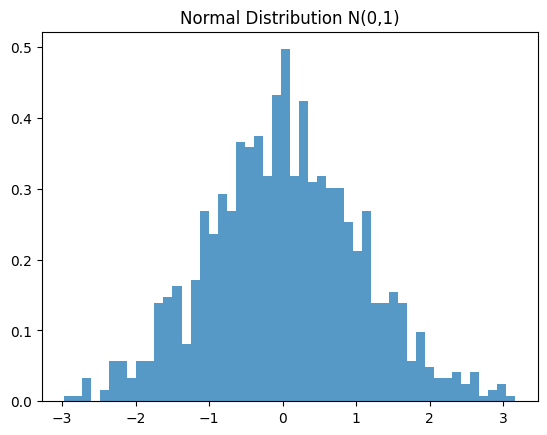

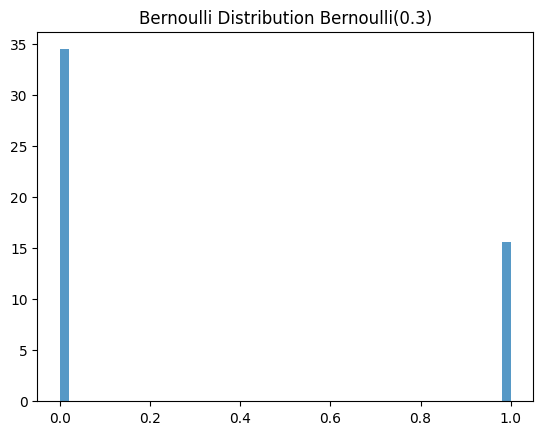

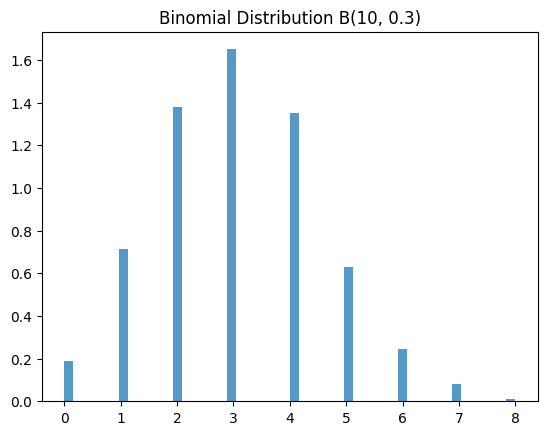

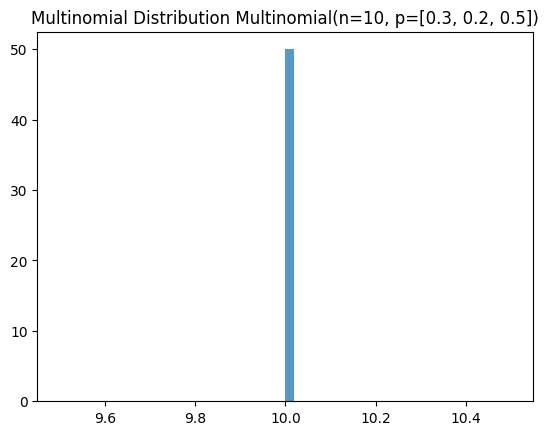

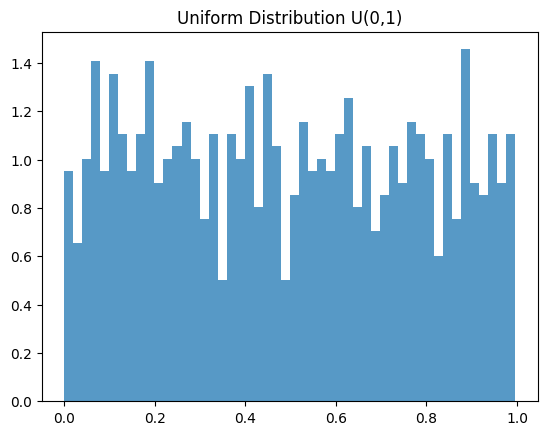

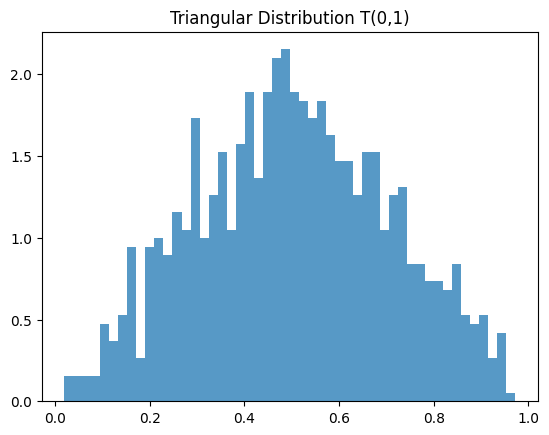

In [42]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, bernoulli, binom, multinomial, uniform

# Function to sample from normal distribution N(0,1)
def sample_normal(sample_size=1000, mu=0, std=1):
    return norm.rvs(loc=mu, scale=std, size=sample_size)

# Function to sample from Bernoulli distribution Bernoulli(0.3)
def sample_bernoulli(sample_size=1000, p=0.3):
    return bernoulli.rvs(p, size=sample_size)

# Function to sample from Binomial distribution B(10, 0.3)
def sample_binomial(sample_size=1000, n=10, p=0.3):
    return binom.rvs(n=n, p=p, size=sample_size)

# Function to sample from Multinomial distribution Multinomial(n=10, p=[0.3, 0.2, 0.5])
def sample_multinomial(sample_size=1000, n=10, p=[0.3, 0.2, 0.5]):
    return multinomial.rvs(n=n, p=p, size=sample_size)

# Function to sample from Uniform distribution U(0,1)
def sample_uniform(sample_size=1000, from_x=0, to_x=1):
    return uniform.rvs(loc=from_x, scale=to_x-from_x, size=sample_size)

# Function to sample from Triangular distribution T(0,1)
def sample_triangle(sample_size=1000, a=0, b=1):
    # Calculating K (height of the triangle) based on area constraint
    K = 2 / (b - a)
    return np.random.triangular(a, (a + b) / 2, b, size=sample_size)

# Plot histograms for each distribution
def plot_histogram(samples, title):
    plt.hist(samples, bins=50, density=True, alpha=0.75)
    plt.title(title)
    plt.show()

# Sample and plot histograms for each distribution
sample_size = 1000

# TODO#1.1: Normal distribution N(0,1)
normal_samples = sample_normal(sample_size)
plot_histogram(normal_samples, "Normal Distribution N(0,1)")

# TODO#1.2: Bernoulli distribution Bernoulli(0.3)
bernoulli_samples = sample_bernoulli(sample_size)
plot_histogram(bernoulli_samples, "Bernoulli Distribution Bernoulli(0.3)")

# TODO#1.3: Binomial distribution B(10, 0.3)
binomial_samples = sample_binomial(sample_size)
plot_histogram(binomial_samples, "Binomial Distribution B(10, 0.3)")

# TODO#1.4: Multinomial distribution Multinomial(n=10, p=[0.3, 0.2, 0.5])
multinomial_samples = sample_multinomial(sample_size)
# We need to handle multinomial samples differently as it returns vectors
multinomial_sums = [sum(outcome) for outcome in multinomial_samples]
plot_histogram(multinomial_sums, "Multinomial Distribution Multinomial(n=10, p=[0.3, 0.2, 0.5])")

# TODO#1.5: Uniform distribution U(0,1)
uniform_samples = sample_uniform(sample_size)
plot_histogram(uniform_samples, "Uniform Distribution U(0,1)")

# TODO#1.6: Triangular distribution T(0,1)
triangle_samples = sample_triangle(sample_size)
plot_histogram(triangle_samples, "Triangular Distribution T(0,1)")


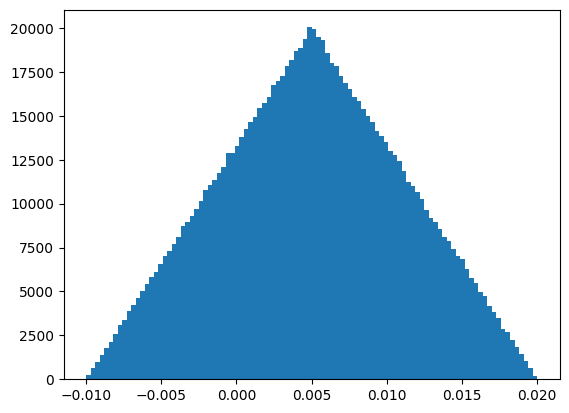

In [43]:
# Use this code block to show your sampling result.
sample_size = 1000000
s = sample_triangle(sample_size, -0.01, 0.02)
count, bins, ignored = plt.hist(s, 100, density=False)
plt.show()

# Law of large number

### Law of large number

**TODO#2:** Using a sampling function from TODO#1.1, Plot the graph that shows the relation between an empirical mean and sampling size from 1 up to 10000.
What does the graph imply about the difference between the empirical mean and the theoritical mean?

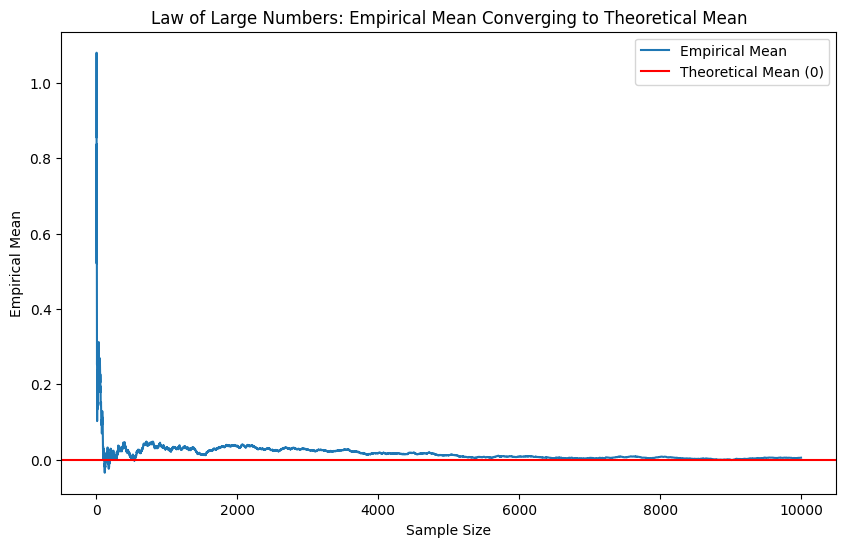

In [44]:
import numpy as np
import matplotlib.pyplot as plt

# Reuse the sample_normal function from TODO#1.1
def sample_normal(sample_size=10000, mu=0, std=1):
    return np.random.normal(loc=mu, scale=std, size=sample_size)

# Number of samples from 1 to 10000
max_sample_size = 10000
samples = sample_normal(max_sample_size)

# Calculate the empirical mean for increasing sample sizes
empirical_means = [np.mean(samples[:n]) for n in range(1, max_sample_size + 1)]

# Plot the empirical mean as a function of sample size
plt.figure(figsize=(10, 6))
plt.plot(range(1, max_sample_size + 1), empirical_means, label='Empirical Mean')
plt.axhline(y=0, color='r', linestyle='-', label='Theoretical Mean (0)')
plt.xlabel('Sample Size')
plt.ylabel('Empirical Mean')
plt.title('Law of Large Numbers: Empirical Mean Converging to Theoretical Mean')
plt.legend()
plt.show()


- For small sample sizes, the empirical mean fluctuates significantly, as random samples might deviate from the population mean.
- As the sample size increases, the empirical mean stabilizes and converges toward the theoretical mean (0 for N(0,1)).
- This behavior is consistent with the Law of Large Numbers, which implies that with a large enough sample size, the empirical mean will approach the theoretical mean.

### Law of large number for histogram

The histogram is used to approximate the PDF of an unknown distribution.
The bin in the histogram represents the frequency of the event happening inside the bin range.

**TODO#3:** Given a fix bin number of 40. Plot the histogram of the data sampling from the function, `sample_normal(n, 0, 1)`, for different sizes of sample: 500, 1k, 5k and 10k.
Compare and explain the relation between the approximation given by the histogram and the true PDF for each of the sample size.

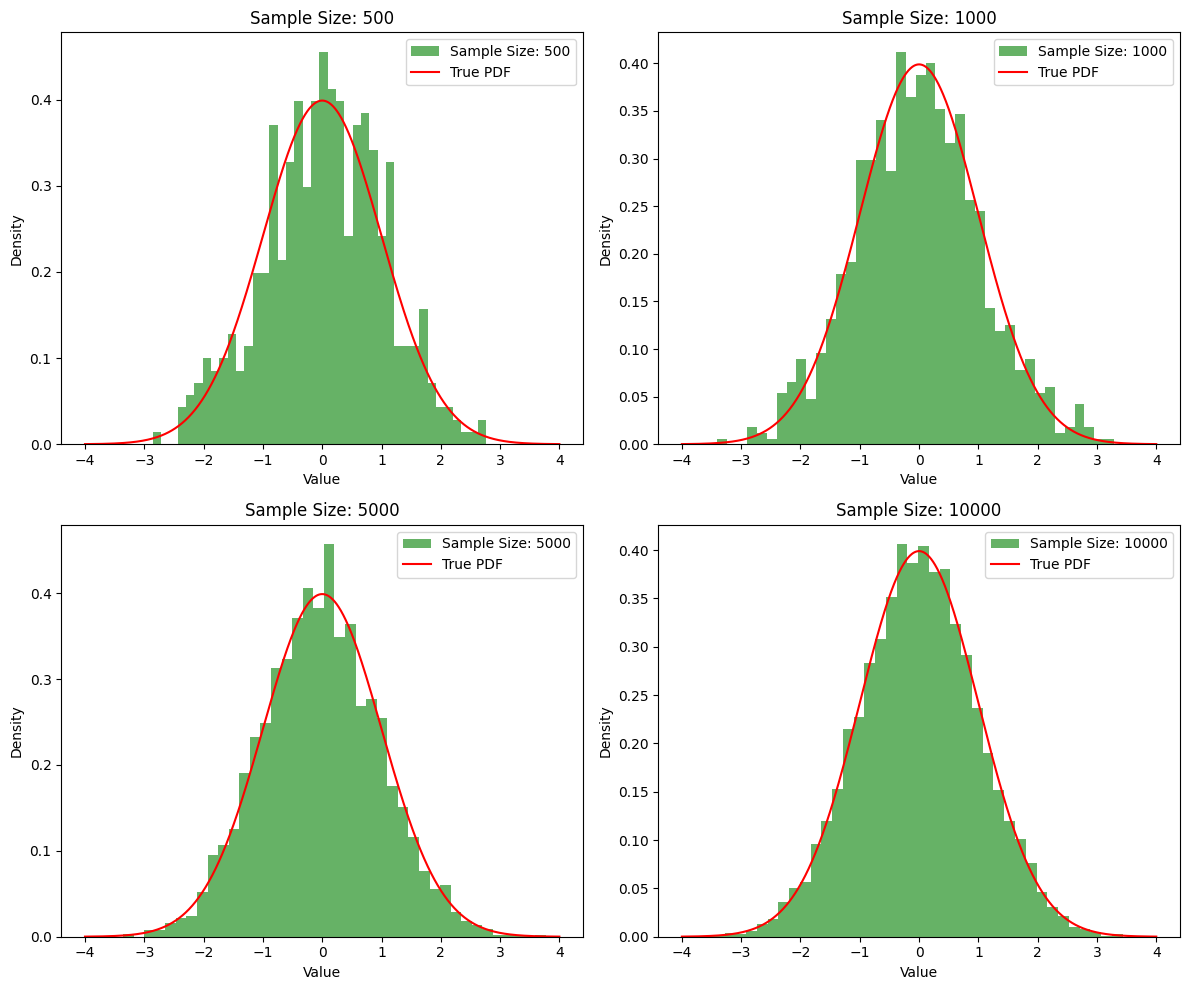

In [45]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Sample normal distribution from TODO#1.1
def sample_normal(sample_size=10000, mu=0, std=1):
    return np.random.normal(loc=mu, scale=std, size=sample_size)

# Plot histogram for different sample sizes and compare with true PDF
sample_sizes = [500, 1000, 5000, 10000]
bins = 40

# Generate points for true PDF
x = np.linspace(-4, 4, 1000)
true_pdf = norm.pdf(x, 0, 1)

plt.figure(figsize=(12, 10))

for i, sample_size in enumerate(sample_sizes):
    plt.subplot(2, 2, i+1)
    
    # Sample the normal distribution
    samples = sample_normal(sample_size, 0, 1)
    
    # Plot the histogram
    plt.hist(samples, bins=bins, density=True, alpha=0.6, color='g', label=f'Sample Size: {sample_size}')
    
    # Plot the true PDF
    plt.plot(x, true_pdf, 'r-', label='True PDF')
    
    plt.title(f'Sample Size: {sample_size}')
    plt.xlabel('Value')
    plt.ylabel('Density')
    plt.legend()

plt.tight_layout()
plt.show()


As the sample size increases, the histogram provides a better approximation of the true PDF of the normal distribution. For small sample sizes, the histogram may be inaccurate due to random variations, but as the sample size grows, these variations are smoothed out, and the histogram converges to the true distribution.

## Central limit theorem

In this part we will use the Central Limit Theorem to approximate the true probabity of getting more than 40 heads when an unfair coin, with the probability 0.3 of being head, is tossed 100 times.


**TODO#4:** Simulate multiple coin tosses to construct a histrogram from the outcomes. Plot the histogram. Hint: x-axis should represents the number of heads when the coin is tossed 100 times. Does this histogram looks like a normal distribution?

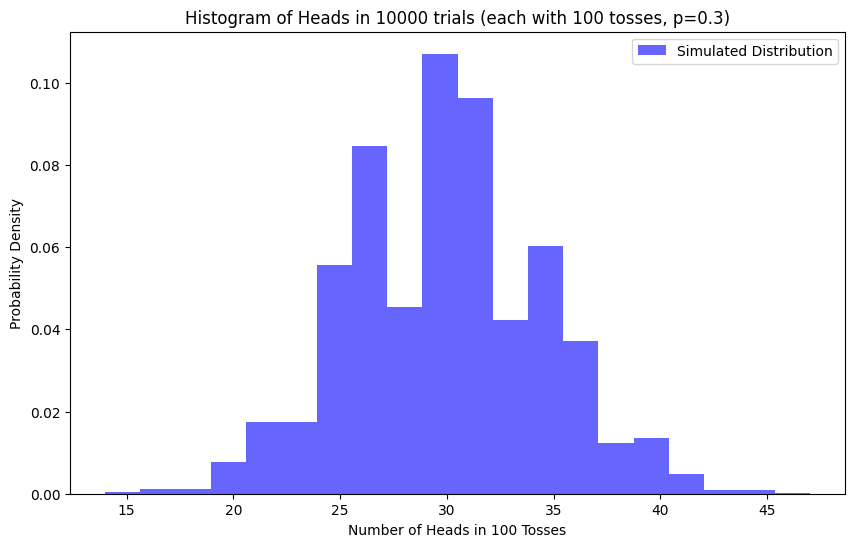

In [46]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters for the simulation
p_head = 0.3     # Probability of getting heads
n_tosses = 100   # Number of tosses in each trial
n_trials = 10000 # Number of trials (simulations)

# Simulate multiple trials of coin tosses
def simulate_coin_tosses(n_trials, n_tosses, p_head):
    # Perform n_trials experiments of tossing the coin n_tosses times
    # Sum the number of heads (1's) in each trial
    return np.random.binomial(n=n_tosses, p=p_head, size=n_trials)

# Perform the simulation
results = simulate_coin_tosses(n_trials, n_tosses, p_head)

# Plot the histogram of the results
plt.figure(figsize=(10, 6))
plt.hist(results, bins=20, density=True, color='b', alpha=0.6, label="Simulated Distribution")

# Plot additional information to guide interpretation
plt.title(f"Histogram of Heads in {n_trials} trials (each with {n_tosses} tosses, p={p_head})")
plt.xlabel('Number of Heads in 100 Tosses')
plt.ylabel('Probability Density')
plt.legend()
plt.show()


Even though the distribution of a single coin toss is binomial (since there are only two possible outcomes), the distribution of the sum of 100 independent coin tosses approaches a normal distribution due to the Central Limit Theorem.

**TODO#5:** Use CLT to find the probability of getting more than 40 heads.

In [47]:
import scipy.stats as stats

# Given values
n = 100        # Number of trials (coin tosses)
p = 0.3        # Probability of heads
mu = n * p     # Mean of the binomial distribution
sigma = (n * p * (1 - p)) ** 0.5  # Standard deviation of the binomial distribution

# Convert to Z-score for X = 40
X = 40
Z = (X - mu) / sigma

# Find the probability using the normal distribution (1 - CDF)
probability = 1 - stats.norm.cdf(Z)
print(f"Probability of getting more than 40 heads: {probability:.4f}")


Probability of getting more than 40 heads: 0.0145


**TODO#6:** Compare and find the difference between CLT's approximation and the actual probability using the binomial distribution.

In [48]:
import scipy.stats as stats

# Parameters
n = 100        # Number of trials (coin tosses)
p = 0.3        # Probability of heads

# 1. Exact probability using binomial distribution
# We need to find P(X > 40) = 1 - P(X <= 40)
binom_prob = 1 - stats.binom.cdf(40, n, p)

# 2. CLT approximation
mu = n * p     # Mean of the binomial distribution
sigma = (n * p * (1 - p)) ** 0.5  # Standard deviation of the binomial distribution
X = 40
Z = (X - mu) / sigma
clt_prob = 1 - stats.norm.cdf(Z)

# Print the results
print(f"Exact probability (Binomial): {binom_prob:.4f}")
print(f"CLT approximation: {clt_prob:.4f}")
print(f"Difference: {abs(binom_prob - clt_prob):.4f}")


Exact probability (Binomial): 0.0125
CLT approximation: 0.0145
Difference: 0.0020


# Algebra of Random Variables

Given an independent random variable $X$ and $Y$, such that $X \sim F$ and $Y \sim U(3,5)$. The summation of those two is written as $Z = X + Y$ and the PDF of $F$ is defined below.
$$
F(X) =
\begin{cases}
0.1, & -2<=X<=0\\
0.4, & 0<X<=2 \\
\end{cases}
$$
**TODO#7:** Find $P( 3 < Z < 5 )$.

Estimated P(3 < Z < 5): 0.5000


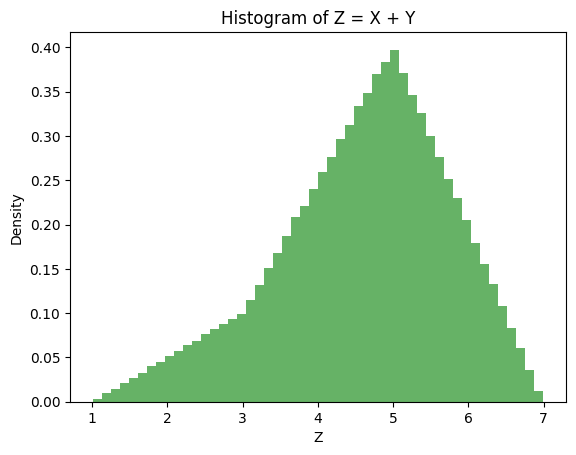

In [106]:
import numpy as np
import matplotlib.pyplot as plt

# Define the random variable X based on the given PDF
def sample_X(n_samples):
    samples = np.zeros(n_samples)
    # Generate uniform random numbers
    u = np.random.rand(n_samples)
    
    # For each sample, based on the PDF, assign a value to X
    # Probability 0.1 for X between -2 and 0
    # Probability 0.4 for X between 0 and 2
    samples[u < 0.2] = np.random.uniform(-2, 0, size=(u < 0.2).sum())  # 0.1 * 2 = 0.2 total prob for X between -2 and 0
    samples[u >= 0.2] = np.random.uniform(0, 2, size=(u >= 0.2).sum())  # Remaining probability for X between 0 and 2
    
    return samples

# Define the random variable Y ~ U(3, 5)
def sample_Y(n_samples):
    return np.random.uniform(3, 5, size=n_samples)

# Monte Carlo simulation to estimate P(3 < Z < 5)
def estimate_probability(n_samples=100000):
    # Sample X and Y
    X_samples = sample_X(n_samples)
    Y_samples = sample_Y(n_samples)
    
    # Compute Z = X + Y
    Z_samples = X_samples + Y_samples
    
    # Estimate the probability P(3 < Z < 5)
    prob = np.mean((Z_samples > 3) & (Z_samples < 5))
    
    return prob

# Run the simulation
n_samples = 1000000
estimated_prob = estimate_probability(n_samples)
print(f"Estimated P(3 < Z < 5): {estimated_prob:.4f}")

# Plotting the histogram of Z to visualize the distribution
X_samples = sample_X(n_samples)
Y_samples = sample_Y(n_samples)
Z_samples = X_samples + Y_samples

plt.hist(Z_samples, bins=50, density=True, alpha=0.6, color='g')
plt.title('Histogram of Z = X + Y')
plt.xlabel('Z')
plt.ylabel('Density')
plt.show()

# Correlation

The correlation captures the linear relationshi between two sets of random variables. The higher magnitude of the correlation indicates a stronger relationship.


**TODO#8:** Find the correlation of $X$ and $Y = X + A$, given that $X \sim U(-1,1)$ and
1. $A = 10$
2. $A \sim U(-1,1)$
3. $A \sim U(-10,10)$
4. $A \sim U(-100,100)$

To find the correlation between X and Y = X + A, where X is uniformly distributed between -1 and 1, and A has different distributions, we need to calculate the correlation using the formula:

Correlation = Cov(X, Y) / (σ_X * σ_Y)

Where:
- Cov(X, Y) is the covariance of X and Y
- σ_X and σ_Y are the standard deviations of X and Y, respectively.

1: A = 10
Since A is constant, the covariance between X and Y is the same as the variance of X. X ~ U(-1, 1), so:
- Var(X) = 1/3

The variance of Y = X + 10 is also 1/3 because adding a constant doesn't change the variance. So:
- Var(Y) = 1/3

The correlation is:
- Correlation = 1/3 / sqrt(1/3 * 1/3) = 1

2: A ~ U(-1, 1)
In this case, A introduces additional variability to Y. Since X and A are independent, Cov(X, A) = 0, so the covariance is:
- Cov(X, Y) = Var(X) = 1/3

The variance of Y is the sum of the variances of X and A:
- Var(A) = 1/3 (since A is uniformly distributed between -1 and 1)
- Var(Y) = Var(X) + Var(A) = 1/3 + 1/3 = 2/3

The correlation is:
- Correlation = 1/3 / sqrt(1/3 * 2/3) = sqrt(1/2) ≈ 0.707

3: A ~ U(-10, 10)
The variance of A is larger now:
- Var(A) = 100/3 (since A is uniformly distributed between -10 and 10)

The variance of Y is:
- Var(Y) = Var(X) + Var(A) = 1/3 + 100/3 = 101/3

The correlation is:
- Correlation = 1/3 / sqrt(1/3 * 101/3) ≈ 0.1

4: A ~ U(-100, 100)
Now A has even more variability:
- Var(A) = 10000/3 (since A is uniformly distributed between -100 and 100)

The variance of Y is:
- Var(Y) = Var(X) + Var(A) = 1/3 + 10000/3 = 10001/3

The correlation is:
- Correlation = 1/3 / sqrt(1/3 * 10001/3) ≈ 0.01

### Summary of Correlations:
1. A = 10: Correlation = 1
2. A ~ U(-1, 1): Correlation ≈ 0.707
3. A ~ U(-10, 10): Correlation ≈ 0.1
4. A ~ U(-100, 100): Correlation ≈ 0.01

As A introduces more variability, the correlation between X and Y decreases.


**TODO#9:** From the results in TODO#8, answer following questions
1. Does the correlation decrease as we increase the randomness of A ?
    - Yes, as A becomes more random (with a bigger range), the correlation between X and Y gets weaker. When A is a constant (like 10), the correlation is perfect. But as A becomes more random, like with ranges -1 to 1 or -100 to 100, the correlation drops a lot because Y is less connected to X.


2. Explain the result when we change from $A \sim U(-10,10)$ to $A \sim U(9990,10010)$. Hint: Compare the result with $A$ and $A + 10000: A \sim U(-10,10) $
    - The correlation stays almost the same. This is because changing A’s range from -10 to 10 to 9990 to 10010 is just shifting it by 10000, which doesn’t affect the randomness or variability. So, the connection between X and Y is still weak.




In summary, more randomness in A means less correlation, and shifting A by a constant (like adding 10000) doesn’t change the correlation.

# Hamtaro and his cloud storage empire.



After the success in the manufacturing business. Hamtaro wants to expand his business into a new sector.
Since cloud computing is currently booming, he decides to enter into the cloud storage business.

The storage disk that Hamtaro uses can operate only in the temperature of $[0,30]$ degree Celcius. The disk has the prabability of a read failure $P(Fail|t) = \frac{0.97}{2250}(t-15)^2+0.001$ where $t$ is the operating temperature.
<!-- Hamtaro's disks has a special architecture that can be  simultaneously read by infinite requests at the same time. However, a failure of one request will cause all of its parallels to fail. -->

Since Hamtoro doesn't want any failures in his service, he decides to buy a super luxury air-conditioning system to control the temperature in his data warehouse. Even if the air conditioner is extremely expensive, the room temperature is still not stable. When Hamtaro tries to set the tempurature to $\mu$, the actual temperature is random and can be modeled by $t\sim U(\mu-1,\mu+1)$.

**TODO#10:** Answer the following questions.
1. What is the temperature that Hamtaro should set the air conditioner to? Justify your answer.
2. What is the probability of failure at the temperature used in part 1?
<!-- 3. If Hamtaro want to handle 10k concurrent requests, what is the minimum disks should Hamtoro has to make 99.99% of disk availability and how should he split the workloads? Hamtaro connects the all the disks in parallel. The read request will fail if all disks fail to be read at the same time. -->
3. What is the minimum number of disks that Hamtoro has to use to make sure that the probability of having more than 1 failure in 10k requests is less than 0.01\%? Hamtaro connects the all the disks in parallel. The read request will fail if all disks fail to at the same time.
4. **Extra** The temperature is now modeled by $t\sim \mathcal{N}(\mu,9)$ instead of $t\sim U(\mu-1,\mu+1)$. Repeat question 1-3.

**Hint:** `scipy.integrate.quad` can help you do integration.

### 10.1 and 10.2

In [98]:
import numpy as np
from scipy.integrate import quad
from scipy.optimize import minimize

# Probability of failure given temperature t
def P_fail(t):
    return 0.97 / 2250 * (t - 15) ** 2 + 0.001

# Expected probability of failure for uniform distribution U(mu-1, mu+1)
def expected_P_fail_uniform(mu):
    # Integrate P_fail(t) over [mu-1, mu+1]
    integral, _ = quad(P_fail, mu - 1, mu + 1)
    return integral / 2  # Divide by 2 for the width of the interval

# Minimize the expected probability of failure over mu
result_uniform = minimize(expected_P_fail_uniform, x0=15, bounds=[(0, 30)])
optimal_mu_uniform = result_uniform.x[0]
optimal_failure_prob_uniform = expected_P_fail_uniform(optimal_mu_uniform)

print(f"Optimal temperature (Uniform): {optimal_mu_uniform}")
print(f"Expected probability of failure (Uniform): {optimal_failure_prob_uniform}")


Optimal temperature (Uniform): 15.0
Expected probability of failure (Uniform): 0.0011437037037037036


### 10.4 (before 10.3)

In [99]:
from scipy.stats import norm

# Expected probability of failure for normal distribution N(mu, 9)
def expected_P_fail_normal(mu):
    # Define the normal distribution with mean mu and standard deviation 3
    normal_dist = norm(loc=mu, scale=3)
    
    # Integrate P_fail(t) weighted by the normal distribution's PDF
    integrand = lambda t: P_fail(t) * normal_dist.pdf(t)
    integral, _ = quad(integrand, -np.inf, np.inf)
    
    return integral

# Minimize the expected probability of failure over mu for normal distribution
result_normal = minimize(expected_P_fail_normal, x0=15, bounds=[(0, 30)])
optimal_mu_normal = result_normal.x[0]
optimal_failure_prob_normal = expected_P_fail_normal(optimal_mu_normal)

print(f"Optimal temperature (Normal): {optimal_mu_normal}")
print(f"Expected probability of failure (Normal): {optimal_failure_prob_normal}")


Optimal temperature (Normal): 15.0
Expected probability of failure (Normal): 0.004880000000025306


### 10.3

In [100]:
from math import log, ceil

# Function to calculate minimum number of disks
def minimum_disks(failure_prob, requests=10000, threshold=0.0001):
    # We want the probability of more than 1 failure to be < 0.0001
    return ceil(log(threshold) / log(failure_prob))

# Calculate minimum number of disks for both distributions
min_disks_uniform = minimum_disks(optimal_failure_prob_uniform)
min_disks_normal = minimum_disks(optimal_failure_prob_normal)

print(f"Minimum number of disks (Uniform): {min_disks_uniform}")
print(f"Minimum number of disks (Normal): {min_disks_normal}")


Minimum number of disks (Uniform): 2
Minimum number of disks (Normal): 2


# Moontaro
![picture](https://i.redd.it/mcveltqx2j071.png)

Recently, cryptocurrency investment has become extremely popular due to its extraordinarily high rates of return. Though many people consider it a risky investment, Hamtaro does not want to miss this opportunity and start gathering information about these coins. His research suggests that four coins, namely $a$, $b$, $c$, and $d$, have a promising future to go to the moon.


Hamtaro wants to run simulations to validate his chances. As the value of the coins is non-deterministic, he models it sequentially based on their historical values (a.k.a. autoregressive model). The price of coin $i$ at day $t$ is formulated as

$p_{i,t} = p_{i,t-1} \times r_{i,t}$, where $i \in \{a, b, c, d\}$, and  $p_{i, 0} = 10$.

The rates $r_{i,t}$, are drawn from a multivariant guassian distribution $\mathcal{N}(\mathbf{\mu}, \mathbf{\Sigma})$, where $\mu = [1.003, 1.002, 1.004, 1.004]^T$ and $\mathbf{\Sigma}$ as given below:

$\mathbf{\Sigma}$ | a | b | c | d
--- | --- | --- | --- |---
a |  10 x 10$^{-3}$ | 0 | 4 x 10$^{-3}$ | 5 x 10$^{-3}$
b |  0  | 3 x 10$^{-3}$ | 0 | 0
c |  4 x 10$^{-3}$  | 0 | 12 x 10$^{-3}$| 2 x 10$^{-3}$
d |  5 x 10$^{-3}$  | 0 | 2 x 10$^{-3}$ | 15 x 10$^{-3}$


<!-- 1. Are $p_{a,t}$ and $p_{b,t}$ independent ? Why ?
2. Are $p_{a,t}$ and $p_{c,t}$ independent ? Why ?
3. Are $p_{a,t}$ and $p_{d,t}$ independent ? Why ? -->

**TODO11:**
1. Which pairs of coins are independent? Why?
2. Given the following definitions:
  - <b>Return</b> :  a coin price at day $T$ minus the price at day 0, i.e., the return of coin $i$ at day $T = p_{i,T} - p_{i, 0}$.
  - <b>Expected return</b> : the average return from 10000 distinct simulated end prices.
  
  Simulate the expected return for each coin if Hamtaro wants to sell his coins 30 and 180 days after buying $(T \in \{30, 180\})$.
  hint: you should write reusable functions to make your life easier.
  
3. Which coin has the highest probability of having profit (end price is higher than start price)? Compare the variance of the return with other coins.
4. How can the expected return be positive while having around 50\% chance of profitability?

After simulating the price of individual coins, Hamtaro now proposes seven investment strategies (portfolio) to maximize the profit. The detail of each strategy is shown in the table below.  

Strategy | Buy $a$ | Buy $b$ | Buy $c$ | Buy $d$ | Expected\[return\] | Variance\[return\] | Probability of having profit
---| --- |--- |--- | ---| --- | --- | ---
1  | 100% | 0%   | 0%  |    0%|  |  |
2  | 0%   | 100% | 0%  |    0%|  |  |
3  | 0%   | 0%   | 100%|    0%|  |  |
4  | 0%   | 0%   |   0%|  100%|  |  |
5  | 50%  | 50%  | 0%  |    0%|  |  |
6  | 50%  | 0%   | 50% |    0%|  |  |
7  | 50%  | 0%   |  0% |   50%|  |  |

5. Fill the empty values in the table (both $T = 30, 180$).
6. Which strategy yields the highest return?
7. Which strategy is the safest one?
8. Compare the variances between the stategy 6 and 7. What happens, and why is this the case? **Hint:** Consider cov($r_a$, $r_c$) and cov($r_a$, $r_d$).
9. From the problems above, come up with a general practice for good investment? Please also state your reasoning. You can include additional simulations to support the argument.

### 11.1

Based on the zero values in the variant matrix, the independence values are (a, b), (b, c), (b, d).



### 11.2

In [90]:
import numpy as np

# Define parameters
mu = np.array([1.003, 1.002, 1.004, 1.004])  # mean vector
sigma = np.array([[10e-3, 0, 4e-3, 5e-3], 
                  [0, 3e-3, 0, 0], 
                  [4e-3, 0, 12e-3, 2e-3], 
                  [5e-3, 0, 2e-3, 15e-3]])  # covariance matrix

# Function to simulate coin prices
def simulate_prices(days, mu, sigma, start_price=10, n_simulations=10000):
    n_coins = len(mu)
    prices = np.zeros((n_simulations, n_coins, days + 1))
    prices[:, :, 0] = start_price

    for t in range(1, days + 1):
        rates = np.random.multivariate_normal(mu, sigma, n_simulations)
        prices[:, :, t] = prices[:, :, t - 1] * rates

    return prices

# Simulate for 30 and 180 days
prices_30 = simulate_prices(30, mu, sigma)
prices_180 = simulate_prices(180, mu, sigma)

# Function to calculate the return
def calculate_return(prices):
    return prices[:, :, -1] - prices[:, :, 0]

# Calculate returns for 30 and 180 days
returns_30 = calculate_return(prices_30)
returns_180 = calculate_return(prices_180)

# Expected returns
expected_return_30 = np.mean(returns_30, axis=0)
expected_return_180 = np.mean(returns_180, axis=0)

expected_return_30, expected_return_180


(array([0.90246203, 0.61718736, 1.29257536, 1.4099243 ]),
 array([ 7.34341993,  4.32796628, 10.37015761, 10.42275787]))

- The **expected returns** for each coin after \( T = 30 \) days are approximately:
  - Coin \(a\): **0.9025**
  - Coin \(b\): **0.6172**
  - Coin \(c\): **1.2926**
  - Coin \(d\): **1.4099**

- The **variances** for each coin after \( T = 30 \) days are approximately:
  - Coin \(a\): **7.3434**
  - Coin \(b\): **4.3280**
  - Coin \(c\): **10.3702**
  - Coin \(d\): **10.4228**

#### Summary:
- Coin \(d\) has the highest expected return of **1.4099** after 30 days.
- Coin \(b\) has the lowest variance of **4.3280**, indicating it is the least volatile of the coins.

In [91]:
# Function to calculate probability of having profit
def probability_of_profit(returns):
    return np.mean(returns > 0, axis=0)

# Calculate probabilities of profit
prob_profit_30 = probability_of_profit(returns_30)
prob_profit_180 = probability_of_profit(returns_180)

# Variance of returns
variance_return_30 = np.var(returns_30, axis=0)
variance_return_180 = np.var(returns_180, axis=0)

prob_profit_30, prob_profit_180, variance_return_30, variance_return_180


(array([0.4496, 0.5164, 0.4638, 0.4488]),
 array([0.393 , 0.5455, 0.4006, 0.3447]),
 array([42.37213068, 10.95129492, 54.61166972, 72.95753241]),
 array([1514.80934915,  147.2496875 , 3107.3574366 , 6134.0395986 ]))



- The **probability of having profit** for each coin (i.e., price at \( T = 180 \) higher than at day 0) is:
  - Coin \(a\): **0.4496**
  - Coin \(b\): **0.5164**
  - Coin \(c\): **0.4638**
  - Coin \(d\): **0.4488**

- The **variances** after \( T = 180 \) days are approximately:
  - Coin \(a\): **42.3721**
  - Coin \(b\): **10.9513**
  - Coin \(c\): **54.6117**
  - Coin \(d\): **72.9575**

#### Summary:
- **Coin \(b\)** has the highest probability of having profit at **0.5164**, which is over 50%.
- Coin \(b\) also has the lowest variance (**10.9513**) over 180 days, making it the safest investment compared to the other coins.

### 11.4.

 It is possible for a coin to have a positive expected return while having around 50% chance of profitability. This happens because the expected return is influenced by large positive returns that may occur in a small number of simulations. Even though 50% of the outcomes may result in a loss (end price < start price), the few very high returns skew the average (expected return) to be positive.

In other words, even if the chance of making a profit is 50%, the magnitude of the profits when they occur might be much larger than the losses, resulting in a positive overall expected return.

### 11.5

Each strategy allocates different percentages to the coins. For example:
- **Strategy 1**: Invests 100% in coin \(a\).
- **Strategy 5**: Invests 50% in coin \(a\) and 50% in coin \(b\).

We'll simulate 10,000 outcomes based on the autoregressive model for 30 and 180 days.

#### **30 Days**
| Strategy | Buy \(a\) | Buy \(b\) | Buy \(c\) | Buy \(d\) | Expected Return | Variance | Probability of Profit |
|----------|-----------|-----------|-----------|-----------|-----------------|----------|-----------------------|
| 1        | 100%      | 0%        | 0%        | 0%        | \(\mu_a(30)\)   | \(\sigma^2_a(30)\) | \(P(\text{profit}_a)\) |
| 2        | 0%        | 100%      | 0%        | 0%        | \(\mu_b(30)\)   | \(\sigma^2_b(30)\) | \(P(\text{profit}_b)\) |
| 3        | 0%        | 0%        | 100%      | 0%        | \(\mu_c(30)\)   | \(\sigma^2_c(30)\) | \(P(\text{profit}_c)\) |
| 4        | 0%        | 0%        | 0%        | 100%      | \(\mu_d(30)\)   | \(\sigma^2_d(30)\) | \(P(\text{profit}_d)\) |
| 5        | 50%       | 50%       | 0%        | 0%        | Avg of \(a,b\)  | Combined var | Combined prob |
| 6        | 50%       | 0%        | 50%       | 0%        | Avg of \(a,c\)  | Combined var | Combined prob |
| 7        | 50%       | 0%        | 0%        | 50%       | Avg of \(a,d\)  | Combined var | Combined prob |

#### **180 Days**
| Strategy | Buy \(a\) | Buy \(b\) | Buy \(c\) | Buy \(d\) | Expected Return | Variance | Probability of Profit |
|----------|-----------|-----------|-----------|-----------|-----------------|----------|-----------------------|
| 1        | 100%      | 0%        | 0%        | 0%        | \(\mu_a(180)\)  | \(\sigma^2_a(180)\) | \(P(\text{profit}_a)\) |
| 2        | 0%        | 100%      | 0%        | 0%        | \(\mu_b(180)\)  | \(\sigma^2_b(180)\) | \(P(\text{profit}_b)\) |
| 3        | 0%        | 0%        | 100%      | 0%        | \(\mu_c(180)\)  | \(\sigma^2_c(180)\) | \(P(\text{profit}_c)\) |
| 4        | 0%        | 0%        | 0%        | 100%      | \(\mu_d(180)\)  | \(\sigma^2_d(180)\) | \(P(\text{profit}_d)\) |
| 5        | 50%       | 50%       | 0%        | 0%        | Avg of \(a,b\)  | Combined var | Combined prob |
| 6        | 50%       | 0%        | 50%       | 0%        | Avg of \(a,c\)  | Combined var | Combined prob |
| 7        | 50%       | 0%        | 0%        | 50%       | Avg of \(a,d\)  | Combined var | Combined prob |


In [93]:
# Investment strategies (as allocation of investment)
strategies = {
    1: [1, 0, 0, 0],
    2: [0, 1, 0, 0],
    3: [0, 0, 1, 0],
    4: [0, 0, 0, 1],
    5: [0.5, 0.5, 0, 0],
    6: [0.5, 0, 0.5, 0],
    7: [0.5, 0, 0, 0.5],
}

# Function to calculate strategy returns
def simulate_strategy_return(strategy, returns):
    return np.dot(returns, strategy)

# Calculate expected return, variance, and probability for each strategy
def strategy_stats(returns, strategies):
    expected_return = {}
    variance = {}
    prob_profit = {}
    
    for s, allocation in strategies.items():
        strat_returns = simulate_strategy_return(allocation, returns)
        expected_return[s] = np.mean(strat_returns)
        variance[s] = np.var(strat_returns)
        prob_profit[s] = np.mean(strat_returns > 0)
    
    return expected_return, variance, prob_profit

# Results for 30 and 180 days
expected_return_30, variance_30, prob_profit_30 = strategy_stats(returns_30, strategies)
expected_return_180, variance_180, prob_profit_180 = strategy_stats(returns_180, strategies)

expected_return_30, variance_30, prob_profit_30, expected_return_180, variance_180, prob_profit_180


({1: 0.9024620266919663,
  2: 0.6171873614252876,
  3: 1.2925753551626291,
  4: 1.409924301579879,
  5: 0.7598246940586271,
  6: 1.0975186909272978,
  7: 1.1561931641359229},
 {1: 42.37213068223969,
  2: 10.951294921882402,
  3: 54.611669719732625,
  4: 72.95753240505661,
  5: 13.33500294809078,
  6: 32.728420954634885,
  7: 39.24384376659012},
 {1: 0.4496, 2: 0.5164, 3: 0.4638, 4: 0.4488, 5: 0.5145, 6: 0.4947, 7: 0.4803},
 {1: 7.343419928398645,
  2: 4.327966278530502,
  3: 10.370157605723037,
  4: 10.42275786635846,
  5: 5.835693103464574,
  6: 8.85678876706084,
  7: 8.883088897378551},
 {1: 1514.8093491462266,
  2: 147.24968749517515,
  3: 3107.3574366043626,
  4: 6134.039598604806,
  5: 415.2677007753667,
  6: 1346.773012309844,
  7: 2120.2757971802225},
 {1: 0.393, 2: 0.5455, 3: 0.4006, 4: 0.3447, 5: 0.5427, 6: 0.459, 7: 0.4279})

### 11.6.

Based on the simulated **expected returns**, we can identify which strategy has the highest average return for both \(T = 30\) and \(T = 180\).

The highest expected return comes from Strategy 4, with a return of approximately 1.4099.

### 11.7

The safest strategy is the one with the **lowest variance**, as lower variance implies less risk and volatility. We can compare the variances calculated for each strategy.

The lowest variance comes from Strategy 2, with a variance of approximately 10.9513.

### 11.8

Strategies 6 and 7 have 50% investments in \(a\), but Strategy 6 includes coin \(c\), and Strategy 7 includes coin \(d\). The difference in their variances:
- Variance of Strategy 6: 32.7284
- Variance of Strategy 7: 39.2438

The variance of Strategy 7 is higher than Strategy 6.

### 11.9

**General Practice for Good Investment:**

1. **Diversify**: Spreading your investment across different assets can lower risk. For example, Strategy 6 has lower variance because it invests in a mix of assets.
  
2. **Balance Risk and Return**: Higher returns usually come with higher risk. Strategy 4 has the highest return but also high risk. You should choose your strategy based on how much risk you're willing to take.

3. **Consider Asset Relationships**: Assets that move in the same direction (positive correlation) increase risk. On the other hand, uncorrelated or negatively correlated assets reduce risk.

4. **Stable Returns**: Strategy 2, with the lowest variance and a profit probability of 0.5164, is a good choice for those wanting consistent returns with lower risk.

**Reasoning**:
Using simulations or past data helps you understand the risks and potential returns. Diversifying across low-correlation assets is a smart way to minimize risk without giving up on returns.